In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt 
import netCDF4 as nc
from netCDF4 import Dataset
import geopandas as gpd
import pandas as pd
import seaborn as sns
import random
import xarray as xr
import numpy as np

In [2]:
#Load all standardized features (emod grid)
emod = xr.open_dataset('/cluster/home/maikents/sinmod_features_masters/standardized_features_emod_grid/EMOD_features_standardized.nc')
chlor_a_satellite = xr.open_dataset('/cluster/home/maikents/sinmod_features_masters/standardized_features_emod_grid/chlor_a_satellite_emod_grid_standardized.nc')
sinmod= xr.open_dataset('/cluster/home/maikents/sinmod_features_masters/standardized_features_emod_grid/sinmod_bottom_features_emod_grid_standardized.nc')

In [3]:
sinmod = sinmod.drop_vars('bottom_temperature_features')

In [4]:
emod_df = emod.to_dataframe().reset_index()

In [16]:
emod_df.to_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_1/emod_df.parquet")

In [5]:
chlor_a_satellite_df = chlor_a_satellite.to_dataframe().reset_index()

In [6]:
chlor_a_satellite_df = chlor_a_satellite_df.drop('spatial_ref', axis=1)

In [17]:
chlor_a_satellite_df.to_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_1/chlor_a_satellite_df.parquet")

In [7]:
temperature = sinmod['bottom_temperature_sundahl_features']

In [8]:
min_temp = temperature.sel(stat='min_(mean_march_may)')
max_temp = temperature.sel(stat='max_(mean_oct_dec)')

In [9]:
min_temp_df = min_temp.to_dataframe().reset_index()
max_temp_df = max_temp.to_dataframe().reset_index()


In [10]:
min_temp_df = min_temp_df.drop('stat', axis=1)

In [11]:
min_temp_df = min_temp_df.rename(columns={col: f"temperature_min_(mean_march_may)" for col in min_temp_df.columns if col not in ['x', 'y']})


In [12]:
max_temp_df = max_temp_df.drop('stat', axis=1)

In [13]:
max_temp_df = max_temp_df.rename(columns={col: f"temperature_max_(mean_oct_dec)" for col in max_temp_df.columns if col not in ['x', 'y']})

In [18]:
min_temp_df.to_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_1/min_temp_df.parquet")

In [19]:
max_temp_df.to_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_1/max_temp_df.parquet")

In [20]:
sinmod = sinmod.drop_vars('bottom_temperature_sundahl_features')

ValueError: These variables cannot be found in this dataset: ['bottom_temperature_sundahl_features']

In [21]:
mean = sinmod.sel(stat='mean')
minimum = sinmod.sel(stat='10th_percentile')
maximum = sinmod.sel(stat='90th_percentile')

mean_data_df = mean.to_dataframe().reset_index()
min_data_df = minimum.to_dataframe().reset_index()
max_data_df = maximum.to_dataframe().reset_index()

mean_data_df = mean_data_df.rename(columns={col: f"{col}_mean" for col in mean_data_df.columns if col not in ['x', 'y']})
min_data_df = min_data_df.rename(columns={col: f"{col}_10th_percentile" for col in min_data_df.columns if col not in ['x', 'y']})
max_data_df = max_data_df.rename(columns={col: f"{col}_90th_percentile" for col in max_data_df.columns if col not in ['x', 'y']})


In [22]:
mean_data_df = mean_data_df.drop('stat_mean', axis=1)
mean_data_df = mean_data_df.drop('spatial_ref_mean', axis=1)

In [23]:
min_data_df = min_data_df.drop('stat_10th_percentile', axis=1)
min_data_df = min_data_df.drop('spatial_ref_10th_percentile', axis=1)

In [24]:
max_data_df = max_data_df.drop('stat_90th_percentile', axis=1)
max_data_df = max_data_df.drop('spatial_ref_90th_percentile', axis=1)

In [27]:
#Combine the sinmod features
sinmod_df = min_data_df.merge(max_data_df, on=['x', 'y'], how='outer')

In [28]:
sinmod_df = sinmod_df.merge(mean_data_df, on=['x', 'y'], how='outer')

In [29]:
sinmod_df.to_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_1/sinmod_df.parquet")

In [2]:
#Load all dataframes and combine
sinmod_df = pd.read_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_1/sinmod_df.parquet")
emod_df = pd.read_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_1/emod_df.parquet")
chlor_a_satellite_df = pd.read_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_1/chlor_a_satellite_df.parquet")
min_temp_df = pd.read_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_1/min_temp_df.parquet")
max_temp_df = pd.read_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_1/max_temp_df.parquet")

In [3]:
combined_df = sinmod_df.merge(emod_df, on=['x','y'], how='outer')

In [4]:
combined_df = combined_df.merge(chlor_a_satellite_df, on=['x','y'], how='outer')

In [5]:
combined_df = combined_df.merge(min_temp_df, on=['x','y'], how='outer')

In [6]:
combined_df = combined_df.merge(max_temp_df, on=['x','y'], how='outer')

In [9]:
combined_df = combined_df.drop(columns=['bottom_current_speed_features_10th_percentile', 'current_aspect_angle_10th_percentile','current_aspect_angle_90th_percentile', 'bottom_statistical_northness_features_10th_percentile','bottom_statistical_eastness_features_10th_percentile', 'bottom_statistical_northness_features_90th_percentile','bottom_statistical_eastness_features_90th_percentile'], axis=1)

In [11]:
combined_df.to_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_1/total_df_sundahl.parquet")

In [3]:
combined_df = pd.read_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_1/total_df_sundahl.parquet")

In [4]:
combined_df = combined_df.rename(columns={
    'bottom_salinity_features_10th_percentile': 'salinity_10th_percentile',
    'bottom_salinity_features_90th_percentile': 'salinity_90th_percentile',
    'bottom_salinity_features_mean': 'salinity_mean',
    'bottom_current_speed_features_90th_percentile': 'current_speed_90th_percentile',
    'bottom_current_speed_features_mean': 'current_speed_mean',
    'bottom_statistical_northness_features_mean': 'statistical_northness',
    'bottom_statistical_eastness_features_mean': 'statistical_eastness',
    'current_aspect_angle_mean': 'current_aspect_angle',
    'temperature_min_(mean_march_may)': 'temperature_min',
    'temperature_max_(mean_oct_dec)': 'temperature_max',
    'bathymetry_32N_Clip_sample': 'bathymetry',
    'log_ruggedness_1': 'log_ruggedness'
})

In [5]:
print(combined_df.columns)

Index(['x', 'y', 'salinity_10th_percentile', 'salinity_90th_percentile',
       'current_speed_90th_percentile', 'salinity_mean',
       'statistical_northness', 'statistical_eastness', 'current_aspect_angle',
       'current_speed_mean', 'aspect_cos', 'aspect_sin', 'bathymetry',
       'broad_BPI_std', 'fine_BPI_std', 'log_ruggedness', 'slope',
       'chlor_a_mean', 'chlor_a_min', 'chlor_a_max', 'temperature_min',
       'temperature_max'],
      dtype='object')


In [7]:
print(len(combined_df.columns))

22


In [8]:
#Change the order for a nicer correlation matrix
new_order = ['x', 'y', 'bathymetry', 'slope', 'fine_BPI_std', 'broad_BPI_std', 'log_ruggedness', 'aspect_cos', 'aspect_sin', 'temperature_min', 'temperature_max',
            'salinity_10th_percentile', 'salinity_mean', 'salinity_90th_percentile', 'current_speed_mean', 'current_speed_90th_percentile',
            'statistical_northness', 'statistical_eastness', 'current_aspect_angle', 'chlor_a_min', 'chlor_a_mean', 'chlor_a_max']
combined_df = combined_df.loc[:, new_order]

In [10]:
combined_df.to_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes/pipeline_1/total_df_sundahl_nicer.parquet")

In [2]:
combined_df = pd.read_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_1/total_df_sundahl_nicer.parquet")

In [3]:
combined_df_cleaned = combined_df.dropna()

In [12]:
combined_df_no_xy = combined_df_cleaned.drop(columns=['x', 'y'])

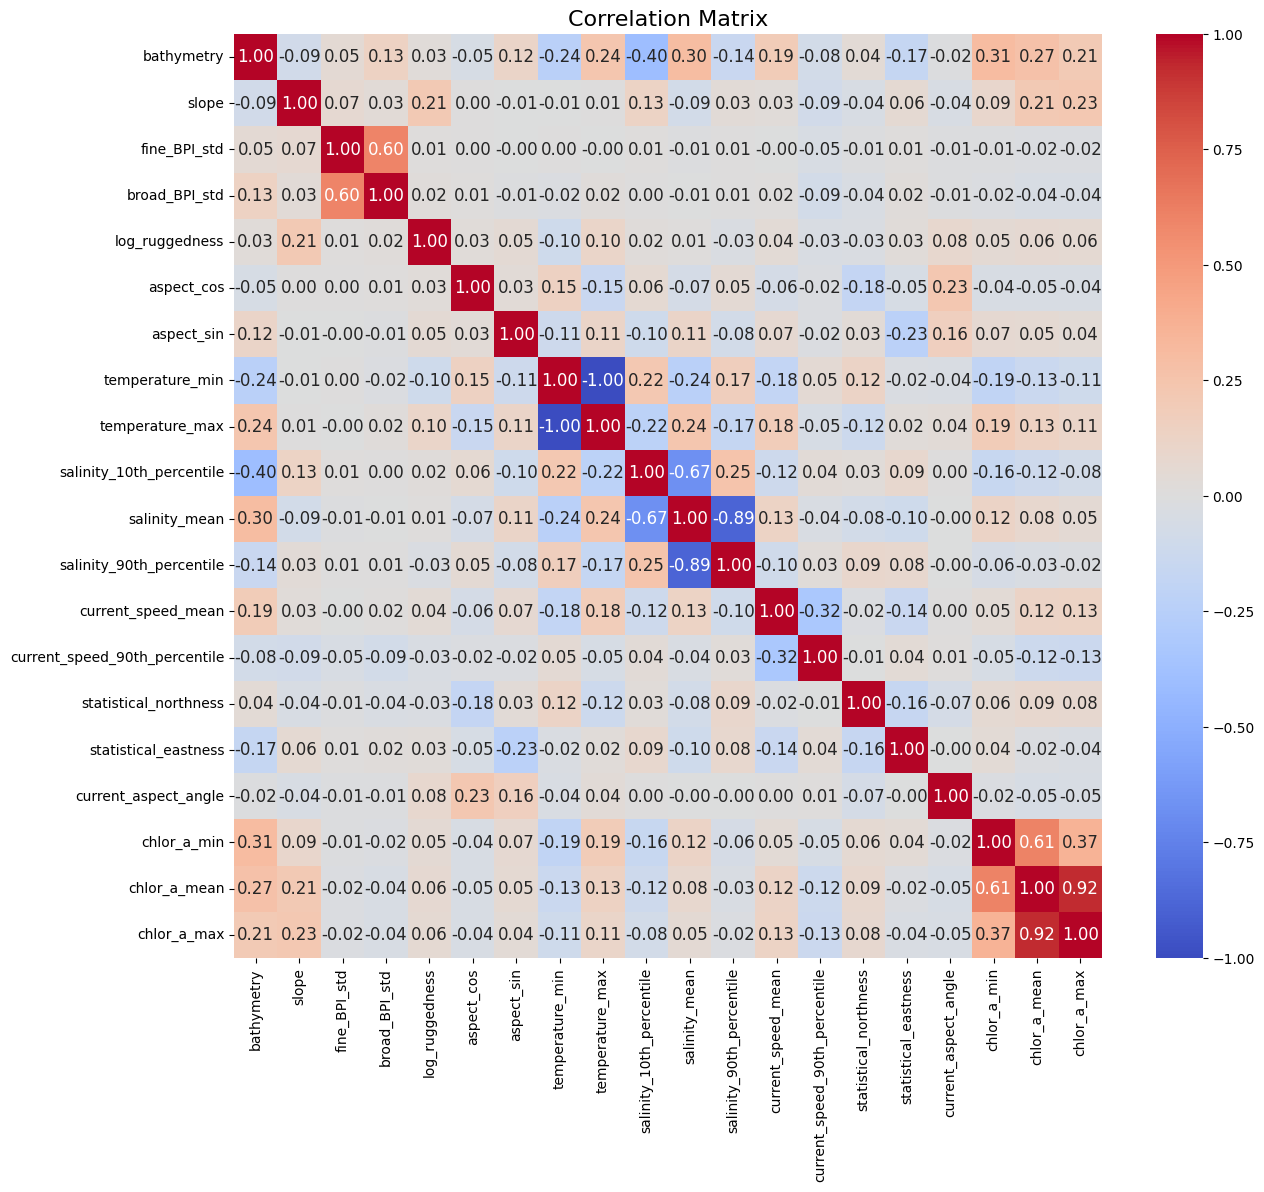

In [16]:
#Creating the correlation matrix

correlation_matrix = combined_df_no_xy.corr()
ordered_corr = correlation_matrix.loc[combined_df_no_xy.columns, combined_df_no_xy.columns]

plt.figure(figsize=(14, 12))  

sns.heatmap(ordered_corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, annot_kws={'size': 12})

plt.title("Correlation Matrix", fontsize=16)
plt.savefig("correlation_matrix.png", dpi=300, bbox_inches='tight') 
plt.show()

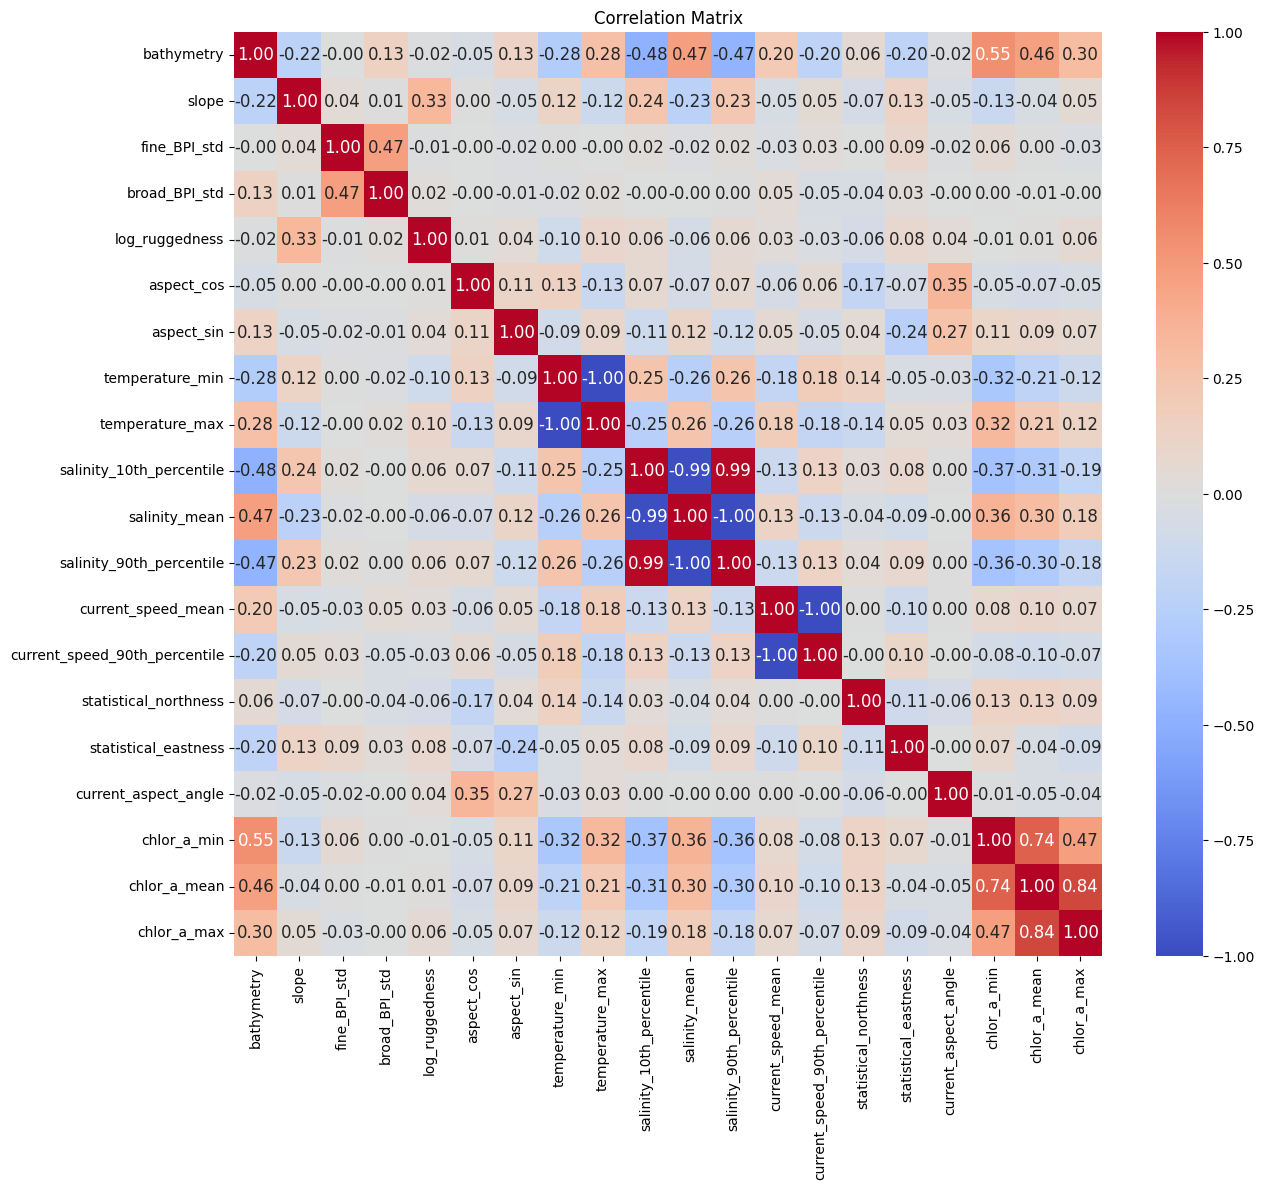

In [17]:
correlation_matrix_ordered = combined_df_no_xy.corr(method='spearman')
ordered_corr_final = correlation_matrix_ordered.loc[combined_df_no_xy.columns, combined_df_no_xy.columns]

plt.figure(figsize=(14, 12))
sns.heatmap(ordered_corr_final, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, annot_kws={'size': 12})
plt.title("Correlation Matrix")
plt.savefig("correlation_matrix_ordered.png", dpi=300, bbox_inches='tight') 
plt.show()

In [18]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

In [20]:
#Make a correlation matrix using hierarchical clustering 
dissimilarity = 1 - abs(correlation_matrix_ordered)
Z = linkage(squareform(dissimilarity), 'complete')
threshold = 0.4
labels = fcluster(Z, threshold, criterion='distance')

labels_order = np.argsort(labels)
for idx, i in enumerate(combined_df_no_xy.columns[labels_order]):
    if idx == 0:
        clustered = pd.DataFrame(combined_df_no_xy[i])
    else:
        df_to_append = pd.DataFrame(combined_df_no_xy[i])
        clustered = pd.concat([clustered, df_to_append], axis=1)

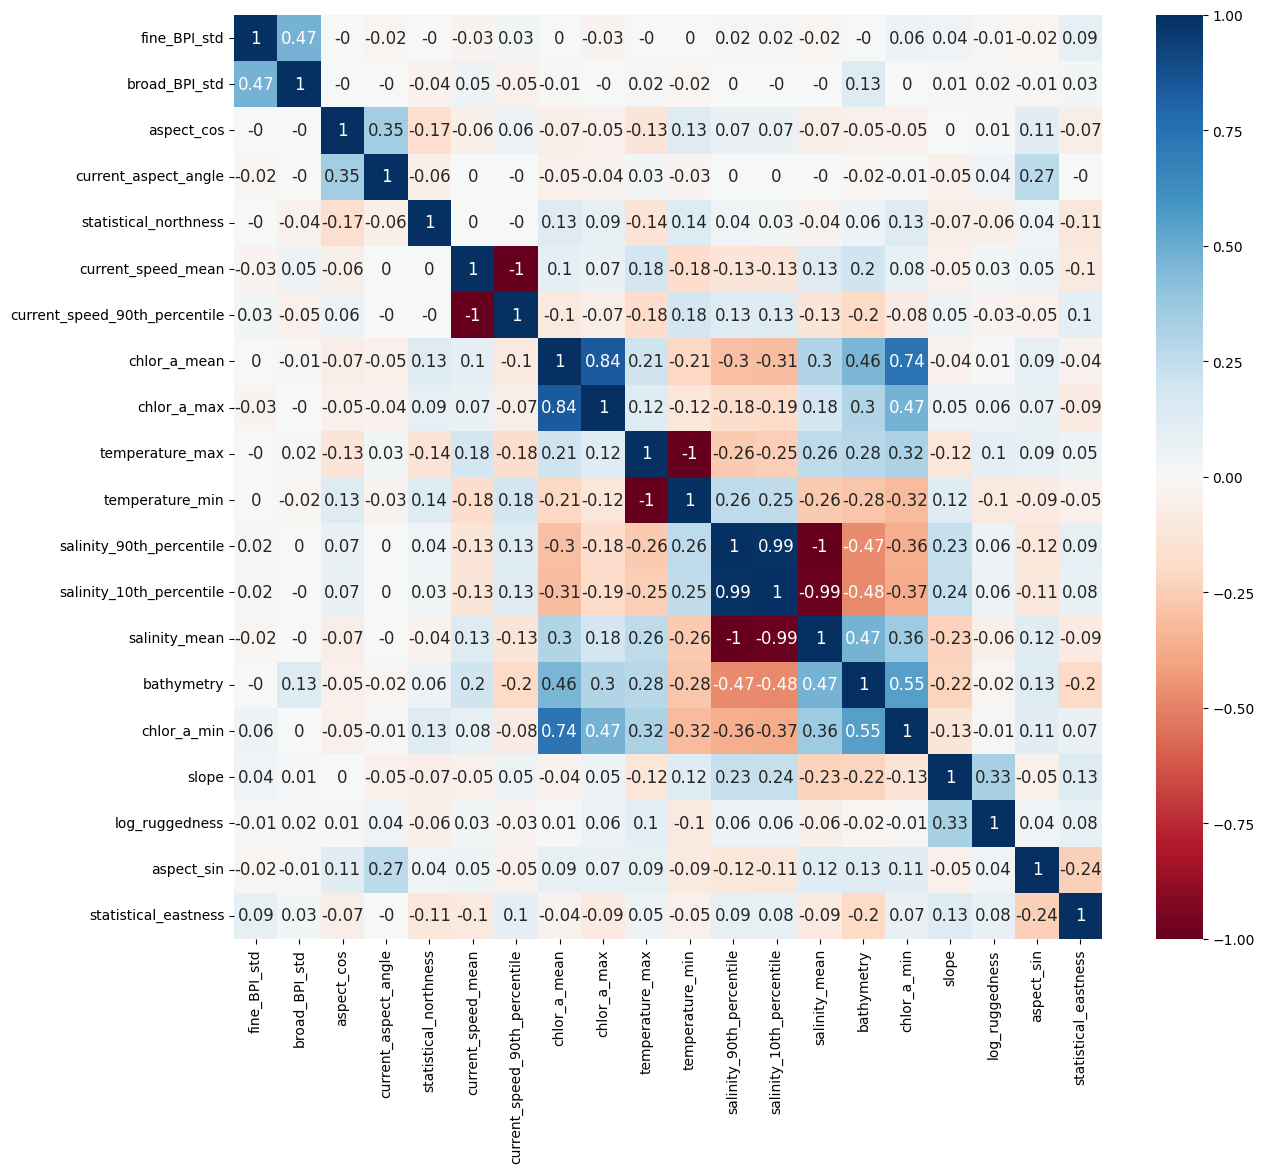

In [22]:
plt.figure(figsize=(14,12))
correlations = clustered.corr(method='spearman')
sns.heatmap(round(correlations,2), cmap='RdBu', annot=True, 
            annot_kws={"size": 12}, vmin=-1, vmax=1);
plt.savefig("correlation_matrix_hierarchical.png", dpi=300, bbox_inches='tight') 
plt.show()

Make a df with additional label column: 1 for coral presence, 0 for no coral presence 

In [4]:
coral_filepath_emod = '/cluster/home/maikents/features_midnor_2019/coral_data/midnor_coral_data_emod_grid.parquet'
coral_data_emod = pd.read_parquet(coral_filepath_emod)

In [2]:
combined_df = pd.read_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_1/total_df_sundahl_nicer.parquet")

In [3]:
combined_df_copy = combined_df.copy()

In [5]:
combined_df_copy['labels'] = 0

available_indices = set(combined_df_copy.index)

for _, coral_point in coral_data_emod.iterrows():
    unassigned_df = combined_df_copy.loc[list(available_indices)]
    
    distances = np.sqrt(
        (unassigned_df['x'] - coral_point['x'])**2 +
        (unassigned_df['y'] - coral_point['y'])**2
    )
    
    if not distances.empty:
        closest_idx = distances.idxmin()
        combined_df_copy.at[closest_idx, 'labels'] = 1
        available_indices.remove(closest_idx)


In [6]:
num_labels_1 = combined_df_copy['labels'].sum()
print(f"Number of rows with label 1: {num_labels_1}")

Number of rows with label 1: 841


In [8]:
print(len(coral_data_emod['x']), len(coral_data_emod['y']))

841 841


In [10]:
combined_df_copy.to_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_1/total_df_with_nans_and_labels.parquet")

In [12]:
combined_df_no_nans = combined_df_copy.dropna()

In [15]:
combined_df_no_nans.to_parquet("/cluster/home/maikents/sinmod_features_masters/dataframes_pipeline_1/total_df_no_nans_and_labels.parquet")